In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.animation as animation
import datetime
import seaborn as sns
import missingno as msno
import firebase_admin
from firebase_admin import credentials, db
from datetime import datetime  # Untuk konversi timestamp ke human-readable
sns.set_theme(style="whitegrid")
%matplotlib inline 

In [2]:
# Konfigurasi database sumber
source_cred = credentials.Certificate("D:/staklimjerukagung-firebase-adminsdk-kcfma-e091165a9b.json")
firebase_admin.initialize_app(source_cred, {
    'databaseURL': 'https://staklimjerukagung-default-rtdb.asia-southeast1.firebasedatabase.app/'
})

In [11]:
# Input readable date
start_readable_date = "01-04-2025 00:00:00"  # Format: DD-MM-YYYY HH:MM:SS
end_readable_date = "30-04-2025 23:59:59"  # Format: DD-MM-YYYY HH:MM:SS

# Convert readable date to Unix timestamp
start_timestamp = int(datetime.strptime(start_readable_date, "%d-%m-%Y %H:%M:%S").timestamp())
print(start_timestamp) # Convert to string and print
end_timestamp = int(datetime.strptime(end_readable_date, "%d-%m-%Y %H:%M:%S").timestamp())
print(end_timestamp) # Convert to string and print


1743440400
1746032399


In [12]:
# Refer ke path data
ref = db.reference('/auto_weather_stat/id-03/data')

# Ambil data yang key-nya berada dalam rentang waktu yang ditentukan
query = ref.order_by_key().start_at(str(start_timestamp)).end_at(str(end_timestamp))

# Ambil hasil
results = query.get()

for timestamp, values in results.items():
    print(f"Timestamp: {timestamp}")
    for key, value in values.items():
        print(f"  {key}: {value}")

Timestamp: 1743440452
  dew: 26.17821
  humidity: 96.23
  pressure: 1009.54
  temperature: 26.83
  timestamp: 1743440452
  volt: 4.05
Timestamp: 1743440512
  dew: 26.19694
  humidity: 96.28
  pressure: 1009.57
  temperature: 26.84
  timestamp: 1743440512
  volt: 4.05
Timestamp: 1743440572
  dew: 26.21744
  humidity: 96.34
  pressure: 1009.53
  temperature: 26.85
  timestamp: 1743440572
  volt: 4.05
Timestamp: 1743440632
  dew: 26.19753
  humidity: 96.34
  pressure: 1009.54
  temperature: 26.83
  timestamp: 1743440632
  volt: 4.05
Timestamp: 1743440692
  dew: 26.19753
  humidity: 96.34
  pressure: 1009.51
  temperature: 26.83
  timestamp: 1743440692
  volt: 4.05
Timestamp: 1743440752
  dew: 26.17938
  humidity: 96.35
  pressure: 1009.51
  temperature: 26.81
  timestamp: 1743440752
  volt: 4.05
Timestamp: 1743440813
  dew: 26.1829
  humidity: 96.37
  pressure: 1009.53
  temperature: 26.81
  timestamp: 1743440813
  volt: 4.05
Timestamp: 1743440873
  dew: 26.1911
  humidity: 96.36
  pressu

In [13]:
# Mengubah data menjadi DataFrame pandas
if results:
    # Mengubah data menjadi DataFrame
    cuacaT = pd.DataFrame.from_dict(results, orient='index')
    
    # Jika 'timestamp' sudah ada, jangan pindahkan indeks ke kolom
    if 'timestamp' not in cuacaT.columns:
        cuacaT.index.name = 'timestamp'  # Mengatur nama indeks
        cuacaT.reset_index(inplace=True)  # Memindahkan indeks menjadi kolom biasa
    
    print(cuacaT.head())  # Menampilkan data untuk verifikasi
else:
    print("Tidak ada data")

                 dew  humidity  pressure  temperature   timestamp  volt  \
1743440452  26.17821     96.23   1009.54        26.83  1743440452  4.05   
1743440512  26.19694     96.28   1009.57        26.84  1743440512  4.05   
1743440572  26.21744     96.34   1009.53        26.85  1743440572  4.05   
1743440632  26.19753     96.34   1009.54        26.83  1743440632  4.05   
1743440692  26.19753     96.34   1009.51        26.83  1743440692  4.05   

            rainfall  rainrate  
1743440452       NaN       NaN  
1743440512       NaN       NaN  
1743440572       NaN       NaN  
1743440632       NaN       NaN  
1743440692       NaN       NaN  


In [14]:
cuacaT.tail(10)

dew  humidity  pressure  temperature   timestamp  volt  \
1745459806  26.04603     86.50   1011.70        28.52  1745459806  4.15   
1745459866  26.08921     86.52   1011.71        28.56  1745459866  4.15   
1745459926  26.09329     86.29   1011.77        28.61  1745459926  4.14   
1745459986  26.10116     86.13   1011.71        28.65  1745459986  4.14   
1745460046  26.22086     86.39   1011.68        28.72  1745460046  4.14   
1745460106  26.20519     86.21   1011.70        28.74  1745460106  4.14   
1745460167  26.08119     85.63   1011.75        28.73  1745460167  4.14   
1745460227  26.00193     85.18   1011.75        28.74  1745460227  4.14   
1745460287  26.10666     85.61   1011.72        28.76  1745460287  4.14   
1745460347  26.33671     86.33   1011.69        28.85  1745460347  4.14   

            rainfall  rainrate  
1745459806       NaN       NaN  
1745459866       NaN       NaN  
1745459926       NaN       NaN  
1745459986       NaN       NaN  
1745460046       NaN       NaN  
1745460106       NaN       NaN  
1745460167       NaN       NaN  
1745460227       NaN       NaN  
1745460287       NaN       NaN  
1745460347       NaN       NaN

In [15]:
cuacaT['timestamp']= cuacaT['timestamp'].astype(int)
cuacaT.tail(10)

dew  humidity  pressure  temperature   timestamp  volt  \
1745459806  26.04603     86.50   1011.70        28.52  1745459806  4.15   
1745459866  26.08921     86.52   1011.71        28.56  1745459866  4.15   
1745459926  26.09329     86.29   1011.77        28.61  1745459926  4.14   
1745459986  26.10116     86.13   1011.71        28.65  1745459986  4.14   
1745460046  26.22086     86.39   1011.68        28.72  1745460046  4.14   
1745460106  26.20519     86.21   1011.70        28.74  1745460106  4.14   
1745460167  26.08119     85.63   1011.75        28.73  1745460167  4.14   
1745460227  26.00193     85.18   1011.75        28.74  1745460227  4.14   
1745460287  26.10666     85.61   1011.72        28.76  1745460287  4.14   
1745460347  26.33671     86.33   1011.69        28.85  1745460347  4.14   

            rainfall  rainrate  
1745459806       NaN       NaN  
1745459866       NaN       NaN  
1745459926       NaN       NaN  
1745459986       NaN       NaN  
1745460046       NaN       NaN  
1745460106       NaN       NaN  
1745460167       NaN       NaN  
1745460227       NaN       NaN  
1745460287       NaN       NaN  
1745460347       NaN       NaN

In [16]:
# Konversi timestamp ke datetime dalam format UTC
cuacaT['timestamp'] = pd.to_datetime(cuacaT['timestamp'], unit='s', utc=True)

# Mengonversi ke zona waktu WIB (Asia/Jakarta)
cuacaT['timestamp'] = cuacaT['timestamp'].dt.tz_convert('Asia/Jakarta')

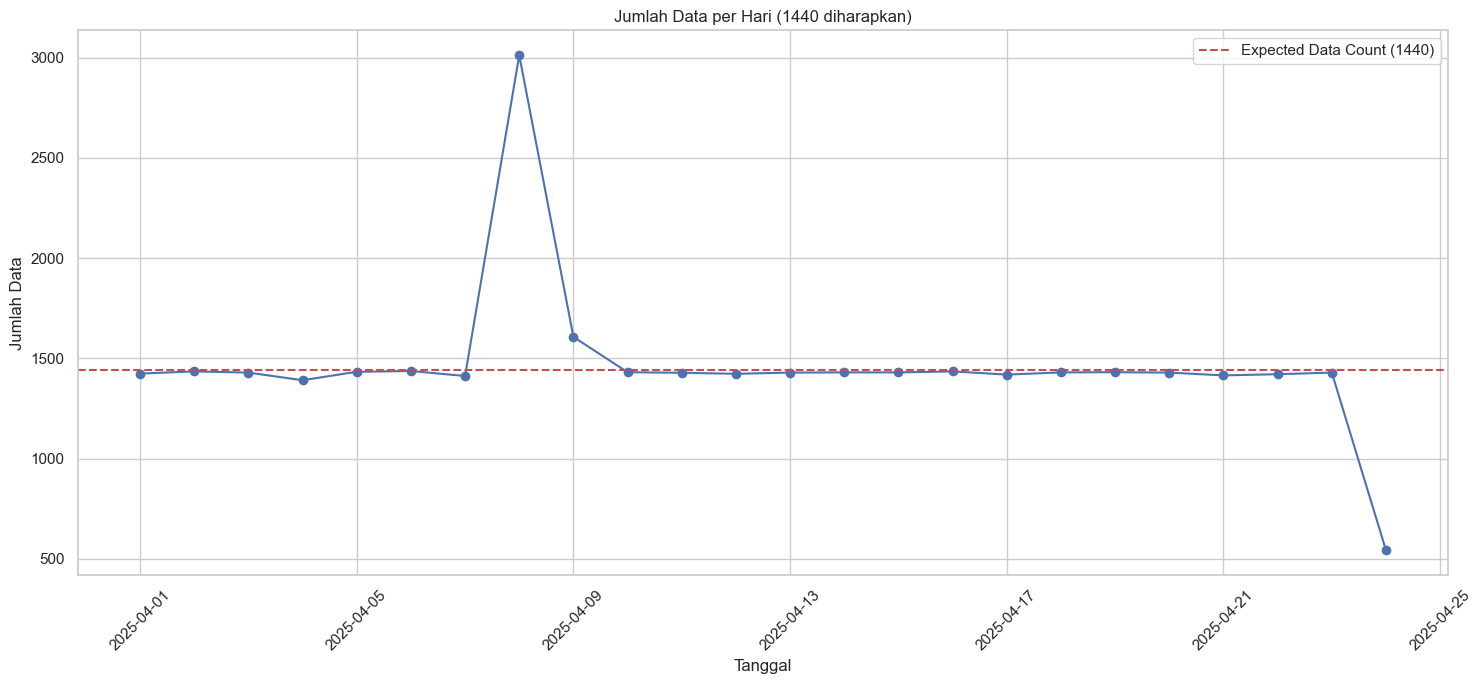

Hari dengan jumlah data yang kurang dari 1440:
          date  count
0   2025-04-01   1424
1   2025-04-02   1435
2   2025-04-03   1429
3   2025-04-04   1391
4   2025-04-05   1433
5   2025-04-06   1437
6   2025-04-07   1412
7   2025-04-08   3012
8   2025-04-09   1607
9   2025-04-10   1431
10  2025-04-11   1428
11  2025-04-12   1423
12  2025-04-13   1429
13  2025-04-14   1430
14  2025-04-15   1430
15  2025-04-16   1435
16  2025-04-17   1419
17  2025-04-18   1430
18  2025-04-19   1431
19  2025-04-20   1429
20  2025-04-21   1415
21  2025-04-22   1421
22  2025-04-23   1429
23  2025-04-24    543


In [17]:
# Mengelompokkan data berdasarkan hari
cuacaT['date'] = cuacaT['timestamp'].dt.date
data_per_day = cuacaT.groupby('date').size().reset_index(name='count')

# Visualisasi jumlah data per hari
plt.figure(figsize=(15, 7))
plt.plot(data_per_day['date'], data_per_day['count'], marker='o', linestyle='-')
plt.axhline(y=1440, color='r', linestyle='--', label='Expected Data Count (1440)')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Data')
plt.title('Jumlah Data per Hari (1440 diharapkan)')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Menampilkan hari-hari yang tidak memenuhi 1440 data
days_with_missing_data = data_per_day[data_per_day['count'] != 1440]
print("Hari dengan jumlah data yang kurang dari 1440:")
print(days_with_missing_data)

In [25]:
cuacaT.dtypes

dew                                 float64
humidity                            float64
pressure                            float64
temperature                         float64
timestamp      datetime64[ns, Asia/Jakarta]
volt                                float64
rainfall                            float64
rainrate                            float64
date                                 object
dtype: object

In [24]:
cuacaT.tail(10)

dew  humidity  pressure  temperature  \
1745459806  26.04603     86.50   1011.70        28.52   
1745459866  26.08921     86.52   1011.71        28.56   
1745459926  26.09329     86.29   1011.77        28.61   
1745459986  26.10116     86.13   1011.71        28.65   
1745460046  26.22086     86.39   1011.68        28.72   
1745460106  26.20519     86.21   1011.70        28.74   
1745460167  26.08119     85.63   1011.75        28.73   
1745460227  26.00193     85.18   1011.75        28.74   
1745460287  26.10666     85.61   1011.72        28.76   
1745460347  26.33671     86.33   1011.69        28.85   

                           timestamp  volt  rainfall  rainrate        date  
1745459806 2025-04-24 08:56:46+07:00  4.15       NaN       NaN  2025-04-24  
1745459866 2025-04-24 08:57:46+07:00  4.15       NaN       NaN  2025-04-24  
1745459926 2025-04-24 08:58:46+07:00  4.14       NaN       NaN  2025-04-24  
1745459986 2025-04-24 08:59:46+07:00  4.14       NaN       NaN  2025-04-24  
1745460046 2025-04-24 09:00:46+07:00  4.14       NaN       NaN  2025-04-24  
1745460106 2025-04-24 09:01:46+07:00  4.14       NaN       NaN  2025-04-24  
1745460167 2025-04-24 09:02:47+07:00  4.14       NaN       NaN  2025-04-24  
1745460227 2025-04-24 09:03:47+07:00  4.14       NaN       NaN  2025-04-24  
1745460287 2025-04-24 09:04:47+07:00  4.14       NaN       NaN  2025-04-24  
1745460347 2025-04-24 09:05:47+07:00  4.14       NaN       NaN  2025-04-24

In [26]:
datacuaca = cuacaT

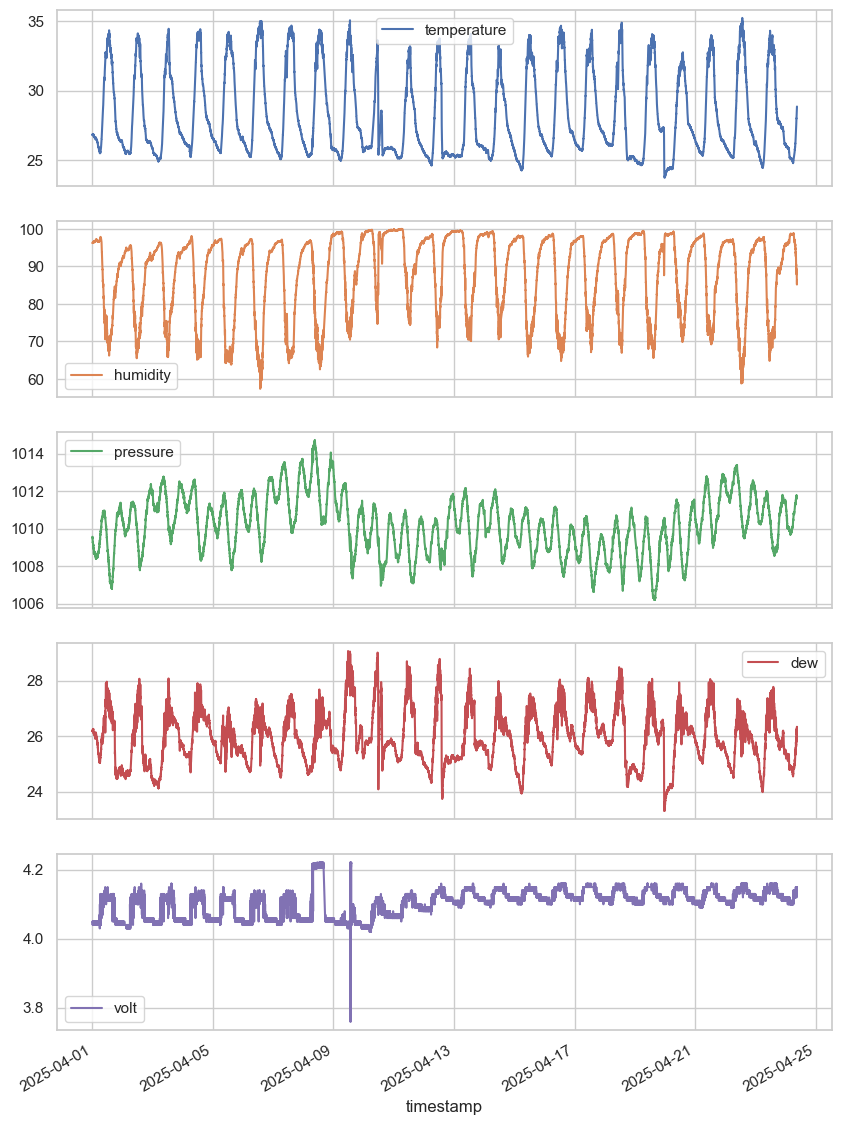

In [27]:
datacuaca.plot(
    y=[
    'temperature', 'humidity', 'pressure', 'dew',
    'volt'
    ],
    x='timestamp',
    subplots=True, figsize=(10, 15))
plt.show()

In [28]:
# Mengubah kolom 'timestamp' menjadi datetime
datacuaca['timestamp'] = pd.to_datetime(datacuaca['timestamp'])

# Mengurutkan data berdasarkan 'timestamp'
datacuaca = datacuaca.sort_values(by='timestamp')

# Menambahkan kolom 'hour', 'minute', 'day', 'month', dan 'year' dari 'timestamp'
datacuaca['hour'] = datacuaca['timestamp'].dt.hour
datacuaca['minute'] = datacuaca['timestamp'].dt.minute
datacuaca['day'] = datacuaca['timestamp'].dt.day
datacuaca['month'] = datacuaca['timestamp'].dt.month
datacuaca['year'] = datacuaca['timestamp'].dt.year

In [29]:
pilih_tahun = 2025
pilih_bulan = 4

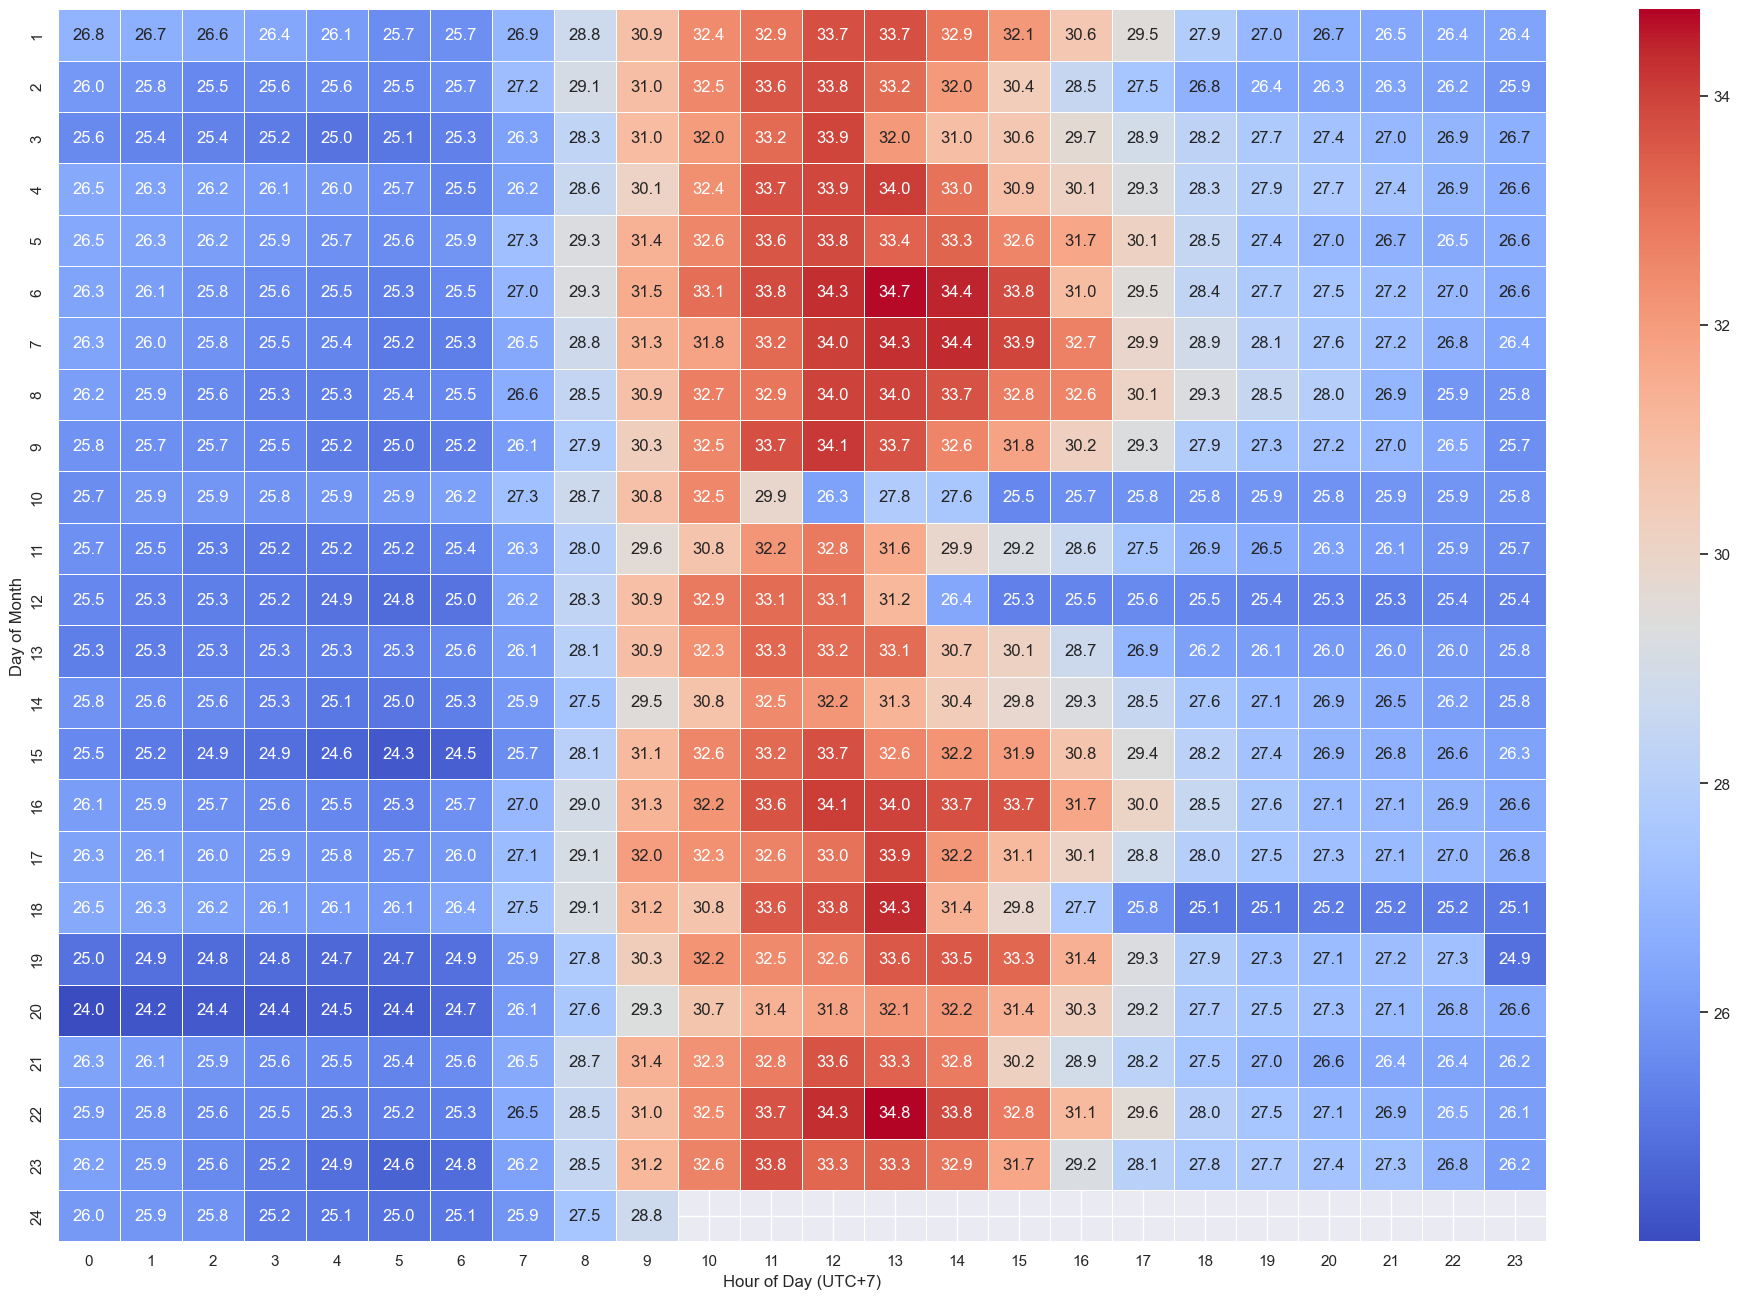

In [30]:
# Mengonversi kolom 'timestamp' menjadi datetime jika belum
datacuaca['timestamp'] = pd.to_datetime(datacuaca['timestamp'])

# Filter data untuk bulan Tertentu
datacuaca_month = datacuaca[(datacuaca['timestamp'].dt.year == pilih_tahun) & (datacuaca['timestamp'].dt.month == pilih_bulan)]

# Mengurutkan data berdasarkan 'timestamp'
datacuaca_month = datacuaca_month.sort_values(by='timestamp')

# Menambahkan kolom 'day' dan 'hour' dari 'timestamp'
datacuaca_month['day'] = datacuaca_month['timestamp'].dt.day
datacuaca_month['hour'] = datacuaca_month['timestamp'].dt.hour

# Mengelompokkan data berdasarkan 'day' dan 'hour', dan menghitung rata-rata suhu
datacuaca_grouped = datacuaca_month.groupby(['day', 'hour']).agg({'temperature': 'mean'}).reset_index()

# Pivot dataframe untuk membuat format yang sesuai dengan heatmap
temperature_pivot = datacuaca_grouped.pivot(index='day', columns='hour', values='temperature')

# Visualisasi heatmap menggunakan seaborn
sns.set_theme()

# Mengatur ukuran grafik
f, ax = plt.subplots(figsize=(24, 16))

# Membuat heatmap dengan anotasi nilai di setiap sel
sns.heatmap(temperature_pivot, annot=True, fmt=".1f", linewidths=.5, ax=ax, cmap="coolwarm")

# Memberi label pada sumbu
ax.set_xlabel('Hour of Day (UTC+7)')
ax.set_ylabel('Day of Month')

# Menampilkan heatmap
plt.savefig("Temp_month" + "_" + str(pilih_tahun) + "_" + str(pilih_bulan) + ".jpg")
plt.show()

